# Lab Seven - Space Weather 

## *Solar Impacts on Geomagnetic Storms*


You will learn how to: 

- Perform linear regression analysis (part two).
- Share an x-axis on plots.
- Utilize the Pearson linear correlation coefficent. 
- Learn the basics of classification problems (set up classification problems).
- Create contingency tables. 
- Calculate skill scores.
- Create a ROC (receivership operating curve).

By the end of this lab you should be able to: analyze linear dependencies and perform simplistic classification analysis. 

Additional materials for reading: 

- Lecture Notes - Lectures 7 & 8
- Igual & Seguí Chapter 5 & 6
- Taylor Chapter 9

Gratitude to [Doga Ozturk](http://clasp.engin.umich.edu/people/dcsoztrk/GSTUDENT) and [Yeimy Rivera](http://clasp.engin.umich.edu/people/yrivera/GSTUDENT) for their assistance in the implementation of this lab. 


### Part A: Recap on Last Lab & Projects


Everyone did very well on the last projects! Your presentations were very good and we can tell that you are learning from this class and putting effort in! This is the way we become good coders, is by trying things and learning from them. 

Some hints on your next projects - be careful not to overshoot the problem but instead make sure that what you do present and focus on has completed the assignment and is clear. We want you to explore in this class and we encourage it! 

In the future assignments we will be putting in places for you to go beyond this class and learn on your own. However, unless you see otherwise, stick to the methods we learned in class. This is so that I can standardize grading for the material you are learning in the class, not skills you may or may not have learned before. 

----


### Part B: Brief Introduction to Space Weather

What IS space weather? 

"Space-weather events are naturally occurring phenomena that have the potential to disrupt electric power systems; satellite, aircraft, and spacecraft operations; telecommunications; position, navigation, and timing services; and other technologies and infrastructures..." Source - [National Space Weather Action Plan](https://obamawhitehouse.archives.gov/sites/default/files/microsites/ostp/final_nationalspaceweatheractionplan_20151028.pdf)

"Space weather refers to the environmental conditions in Earth's magnetosphere (e.g. magnetic environment), ionosphere and thermosphere (e.g. upper atmosphere) due to the Sun and the solar wind that can influence the functioning and reliability of spaceborne and ground-based systems and services or endanger property or human health." Source - [European Space Agency](http://swe.ssa.esa.int/what-is-space-weather)

In this lesson we learn about space weather and how the Sun through the solar surface, magnetic fields, and particles impacts the environment around Earth. A commonly known phenomena that falls within space weather - 

<img src="./Images/AuroraNASA_Earth.jpg" alt="Drawing1" width="400px"/><img src="./Images/AuroraNASA.jpg" alt="Drawing2" width="400px"/>

Sources: [NASA](https://www.nasa.gov/mission_pages/sunearth/news/gallery/HugoLAchre-20121010.html) & [NASA](https://www.nasa.gov/image-feature/aurora-and-the-pacific-northwest) 

### Part C: Space Weather Impacts on Earth

Go to your images folder and open ./Example_GeoSpaceWeather.mp4 

Here we see a solar event (magnetic field and particles) impacting the Earth's magnetosphere (magnetic environment) and causes the aurora. 

Source: [NASA](https://svs.gsfc.nasa.gov/20097)


## *Part 1 - Looking at Solar Dynamic Observatory (SDO) Data and Solar Wind Data*

The Sun is dynamic, at certain periods in time it can be either more active (solar maximum), or less active (solar minimum). SDO has been taking images and other data of the Sun since ~ 2010.

This data is from https://sdo.gsfc.nasa.gov/

Please explore under ./Data/ the videos of the Sun in quiet, and active time ranges. Compare the same colors to each other, what do we observe?
 
 -
 
 -
 
 -

In [647]:
import numpy as np                              #for accuracy 
import datetime as dt                           #for datetime objects
import matplotlib.pyplot as plt                 #for pretty plotting
import pandas as pd                             #for data structures
from   scipy import stats                       #for linear regression
import matplotlib.dates as mdt                  #for manipulation of dates in matplotlib
from   matplotlib.ticker import MultipleLocator #for pretty plotting
import matplotlib.image as mpimg                #for manipulation of img files
                                                #in plotting environments
import importlib                                #for reimporting libaries / package
import linerror as lr                           #same as Lab6 - for calculating linear
                                                #fits
        
from   matplotlib.patches import Rectangle      #NEW IN THIS LAB
                                                #for plotting rectangles
    
import externalfunctions as extFunc             #NEW IN THIS LAB
                                                #for easy importing
    
from   sklearn.metrics import confusion_matrix  #NEW IN THIS LAB
                                                #for confusion matrix
#for plotting in notebook
%matplotlib inline

In [648]:
#starting with something simple - let's just use pcolormesh to plot the solar
#data we saw from before

###read in image files

quietSun = mpimg.imread('./Data/SolarMinImages/20180105_022906_512_0304.jpg')
activeSun = mpimg.imread('./Data/SolarMaxImages/20130317_044532_512_0304.jpg')


[]

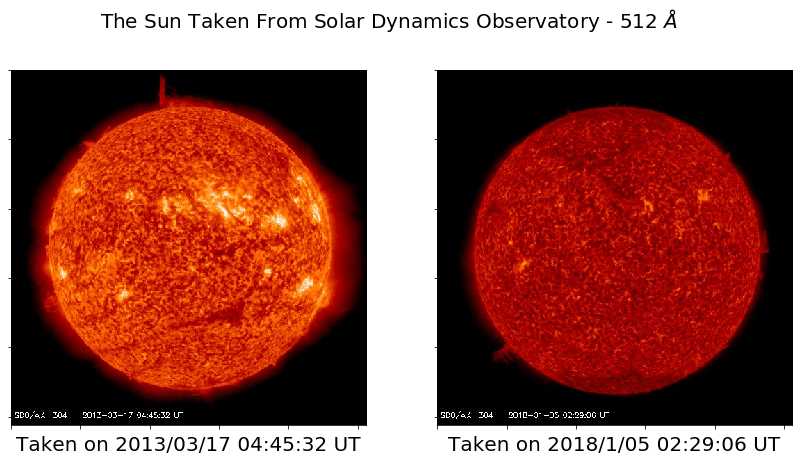

In [649]:

####Set up a 1x2 matplotlib plot with solar data - 

fig = plt.figure(figsize=(14, 7))
fig.suptitle('The Sun Taken From Solar Dynamics Observatory - 512 $\AA$', fontsize=20)

gs = plt.GridSpec(1, 2, hspace=0.1, wspace=0.2, right = 0.9)

#add subplots
ax1 = fig.add_subplot(gs[:,0])
ax2 = fig.add_subplot(gs[:,1])

#make aspect ratio better - 1.0 is square. Feel free to play around with these
#and see how it streches.
ax1.set_aspect(1.0)
ax2.set_aspect(1.0)

#plot images data - note for now use imshow to plot out the 3D datasets

ax1.imshow(activeSun)
ax2.imshow(quietSun)

#setting labeling
ax1.set_xlabel('Taken on 2013/03/17 04:45:32 UT',   fontsize = 20)
ax2.set_xlabel('Taken on 2018/1/05 02:29:06 UT', fontsize = 20)

#setting tick parameters to null - these are just pixel values so in this case, not
#incredibly informative
ax1.set_xticklabels([]) #make the tick labels
ax2.set_xticklabels([])

ax1.set_yticklabels([]) #make the tick labels
ax2.set_yticklabels([])


In [650]:
###let's add some near-Earth data here to the images of the sun - 

#This data is from the OMNI site - https://omniweb.gsfc.nasa.gov/html/ow_data.html#1

#"primarily a 1963-to-current compilation of hourly-averaged, near-Earth solar 
#wind magnetic field and plasma parameter data from several spacecraft in geocentric or 
#L1 (Lagrange point) orbits. The data have been extensively cross compared, and, 
#for some spacecraft and parameters, cross-normalized. Time-shifts of higher 
#resolution data to expected magnetosphere-arrival times are done for data from 
#spacecraft in L1 orbits (ISEE 3, Wind, ACE), prior to taking hourly averages."

colNames = ['YEAR', 'DOY', 'Hour', 'BX', 'BY', 'BZ', 'FlowPressure', 'Ey', 'Kp', 
            'SunspotNumber', 'Dst', 'f10.7_index']

hourOmni = pd.read_csv('./Data/omni2_Hourly1980_2018.lst', sep = '\s+', names = colNames,
                          parse_dates = {'Datetime': colNames[0:3]}, keep_date_col = 'True')

hourOmni.index = pd.to_datetime(omniData['Datetime'], infer_datetime_format = False, 
                                   format = '%Y %j %H')


#look at the first two rows using head, and the last row - what do we notice?

#
#
#
#
#
#ENTER COMMANDS









#
#
#
#

In [651]:
#replacing null values with np.nan

#null values are 9's in whatever format is specified in the read me from
#the data site 


#because the data has different format - we replace the similarly formatter
#columns with each of the retrospective nan values.

hourOmni[['BX', 'BY', 'BZ', 'f10.7_index']] = omniData[[
    'BX', 'BY', 'BZ', 'f10.7_index']].replace(to_replace = 999.9, value = np.nan)

hourOmni['FlowPressure'] = omniData['FlowPressure'].replace(
    to_replace = 99.99, value = np.nan)

hourOmni['Ey'] = omniData['Ey'].replace(to_replace = 999.99, value = np.nan)

hourOmni[['SunspotNumber', 'Kp']] = omniData[['SunspotNumber', 'Kp']].replace(
    to_replace = 999, value = np.nan)


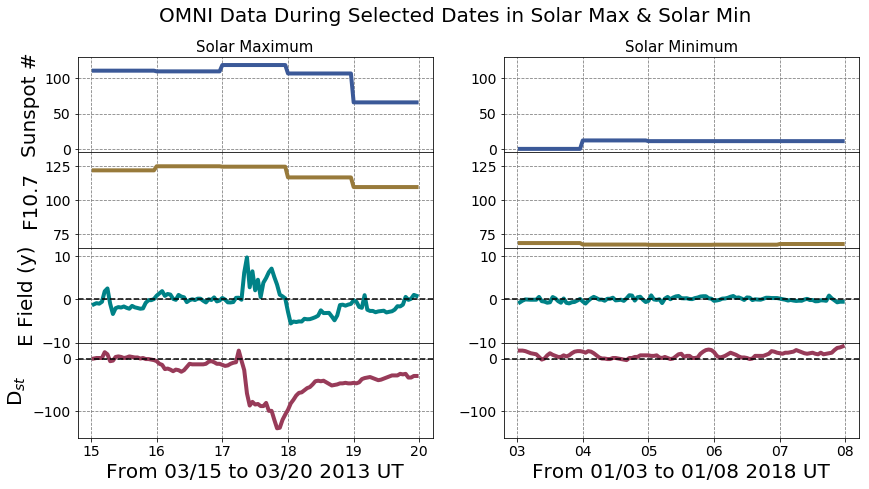

In [652]:
#now let's look at the near-Earth OMNI data - here we plot some selected parameters


startDateActive = dt.datetime(2013, 3, 15)
stopDateActive  = dt.datetime(2013, 3, 20)

indActive =  (hourOmni.index > startDateActive) & (hourOmni.index < stopDateActive)

startDateQuiet  = dt.datetime(2018, 1, 3)
stopDateQuiet   = dt.datetime(2018, 1, 8)

indQuiet = (hourOmni.index > startDateQuiet) & (hourOmni.index < stopDateQuiet)


fig = plt.figure(figsize=(14, 7))
fig.suptitle('OMNI Data During Selected Dates in Solar Max & Solar Min', fontsize=20)

gs  = plt.GridSpec(4, 2, hspace=0.0, wspace=0.2, right = 0.9)

#add subplots
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[2,0])
ax4 = fig.add_subplot(gs[3,0])

ax5 = fig.add_subplot(gs[0,1])
ax6 = fig.add_subplot(gs[1,1])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[3,1])



#set up titles for ranges
ax1.set_title('Solar Maximum', fontsize = 15)
ax5.set_title('Solar Minimum', fontsize = 15)

#set up titles for 
ax1.set_ylabel('Sunspot #', fontsize = 20)
ax2.set_ylabel('F10.7', fontsize = 20)
ax3.set_ylabel('E Field (y)', fontsize = 20)
ax4.set_ylabel('D$_{st}$', fontsize = 20)


#and plot and add colors / line width - 

#set up list of axes objects
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]

#set up list labels
labels = ['SunspotNumber', 'f10.7_index', 'Ey', 'Dst']
#set up list of colors
colors = ['#3b5998', '#987a3b', '#008287', '#983b59']


#loop over axes, colors and labels to produce multiple
#subplots
for ax, label, c in zip(axes[0:4], labels, colors):
    
    ax.plot(hourOmni.loc[indActive, :].index.to_pydatetime(), 
         hourOmni.loc[indActive, label], color = c, lw = 4.0)
    
for ax, label, c in zip(axes[4:9], labels, colors):

    ax.plot(hourOmni.loc[indQuiet, :].index.to_pydatetime(), 
         hourOmni.loc[indQuiet, label], color = c, lw = 4.0)

    
#set up the labels to designate the time ranges
ax4.set_xlabel('From {:%m/%d} to {:%m/%d %Y} UT'.format(startDateActive, 
                stopDateActive), fontsize = 20)
ax8.set_xlabel('From {:%m/%d} to {:%m/%d %Y} UT'.format(startDateQuiet, 
                stopDateQuiet), fontsize = 20)

#SET UP FORMAT
ax4.xaxis.set_major_locator(mdt.DayLocator())
ax4.xaxis.set_major_formatter(mdt.DateFormatter('%d'))

ax8.xaxis.set_major_locator(mdt.DayLocator())
ax8.xaxis.set_major_formatter(mdt.DateFormatter('%d'))

#setting tick parameters to null - these are just pixel values so in this case, not
#incredibly informative
ax1.set_xticklabels([]) #make the tick labels small in overlap
ax2.set_xticklabels([])
ax3.set_xticklabels([])

ax5.set_xticklabels([]) #make the tick labels small in overlap
ax6.set_xticklabels([])
ax7.set_xticklabels([])


#set axis ranges
ax1.set_ylim([-5, 130])
ax5.set_ylim([-5, 130])

ax2.set_ylim([65, 135])
ax6.set_ylim([65, 135])

ax3.set_ylim([-10, 12])
ax7.set_ylim([-10, 12])

ax4.set_ylim([-150, 30])
ax8.set_ylim([-150, 30])

#this is repetitive - to set each one so we make a for loop
for ax in axes: 
    ax.grid(color='gray', linestyle='dashed')
    ax.tick_params(labelsize = 14)
    


#set up zero line 
ax3.axhline(y=0.0, color='k', linestyle='--') #add a horizontal line at 0
ax4.axhline(y=0.0, color='k', linestyle='--') 
ax7.axhline(y=0.0, color='k', linestyle='--') 
ax8.axhline(y=0.0, color='k', linestyle='--')




### From looking at these plots what can we say hypothesize about the correlation between these quantities?

## *Part 2 - Looking at Solar Cycle Data*

So far we've seen two examples of a few hours and snapshots of the solar max and solar min - what does this look like overtime? 

Let's download some lower resolution time data - 

In [653]:
#download daily and monthly resolution data - this is from the same
#omni site as before but this is now at different (lower) resolution

dailyOmni = extFunc.loadOmniData('./Data/omni2_Daily1980_2018.lst')
monthlyOmni = extFunc.loadOmniData('./Data/omni2_27Day1980_2018.lst')

#go ahead and write some data checking statements below, 
#print out columns, tail etc. 

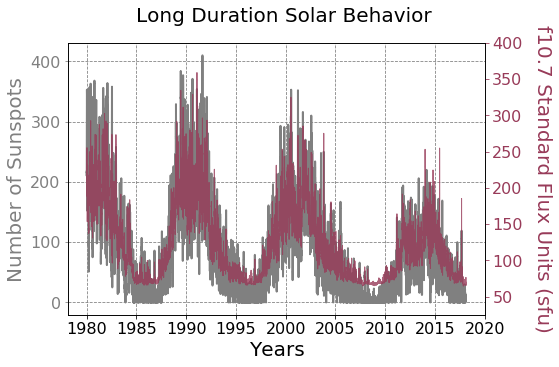

In [654]:
#let's take a look at the long duration trend of some of those values from before - 

fig = plt.figure(figsize=(8, 5))
fig.suptitle('Long Duration Solar Behavior', fontsize=20)

gs  = plt.GridSpec(1, 1, hspace=0.0, wspace=0.2, right = 0.85)

#add subplots
ax1 = fig.add_subplot(gs[0,0])


#this ties together ax1 and ax2 - 
ax2 = ax1.twinx()

#set up titles for axis
ax1.set_ylabel('Number of Sunspots', fontsize = 20, color = 'grey')
ax2.set_ylabel('f10.7 Standard Flux Units (sfu)', fontsize = 20, 
               color = '#983b59', rotation = 270, labelpad = 30)

ax1.plot(monthlyOmni.index.to_pydatetime(), monthlyOmni['SunspotNumber'], 
         color = 'grey', lw = 2.0)

ax2.plot(monthlyOmni.index.to_pydatetime(), monthlyOmni['f10.7_index'], 
         color = '#983b59', lw = 1.0, alpha = 0.8)
    
ax1.set_xlabel('Years', fontsize = 20)

#SET UP FORMAT
ax1.xaxis.set_major_locator(mdt.YearLocator(5))
ax1.xaxis.set_major_formatter(mdt.DateFormatter('%Y'))

ax1.grid(color='gray', linestyle='dashed')

#how to set up a share axis with alternative colors
ax1.tick_params('y', colors = 'grey', labelsize = 16)
ax2.tick_params('y', colors = '#983b59', labelsize = 16)

#set label size of the x axis
ax1.tick_params('x', labelsize = 16)

#nudge it up a bit 
ax2.set_ylim([25, 400])

plt.savefig('./Figures/LongDurationSolar.png')



### What can we observe from this chart? This is an alternative if you have different scales of data but would like them to be still on the same plot without a legend.

## *Part 3 - Linear Regression of Solar Cycle Data*

Given the above figure - let's now remove time and instead plot 10.7 vs sunspot number - do we think this would be linear? In the last lab we performed linear regression along with the error values along this line. 

Let's repeat that analysis but add in the Pearson correlation coefficent.

In [655]:
#since this doesn't work on nan values first we remove all potential nans' 

nanMask = ((~np.isnan(monthlyOmni['SunspotNumber'])) & 
           (~np.isnan(monthlyOmni['f10.7_index'])))
xVals = monthlyOmni.loc[nanMask, 'SunspotNumber']
yVals = monthlyOmni.loc[nanMask, 'f10.7_index']

slope, intercept, rval, pval, stderr = stats.linregress(xVals, yVals)


#calculate the yvalues given the linear fit
yModel = intercept + slope * xVals


#find y errors
RMSE  = lr.calcRMSE(yModel, yVals)

#error on coefficents, slope and y-intercept and.
errSlope,  errInter = lr.calcCoeffsErr(xVals,  RMSE)


#print out fit report - 
print("Fit Report: \n \tUncert. on Y: +/- {:.2f}".format(RMSE) + 
      "\n \tIntercept: {:.2f} +/- {:.2f}".format(intercept, errInter)
      + "\n\tSlope: {:.2f} +/- {:.2f}".format(slope, errSlope) 
      + "\n\tPearson linear correlation: {:.2f}, r-squared: {:.2f}".format(rval, rval**2))




Fit Report: 
 	Uncert. on Y: +/- 16.03
 	Intercept: 67.20 +/- 0.04
	Slope: 0.62 +/- 0.00
	Pearson linear correlation: 0.95, r-squared: 0.90


### Do we think this is linear? What does this report tell us?

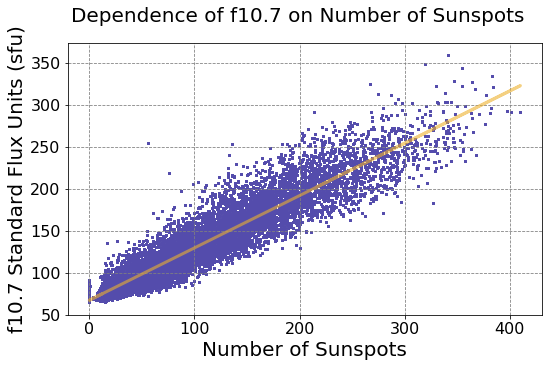

In [656]:
#let's take a look at the long duration trend of some of those values from before - 

fig = plt.figure(figsize=(8.5, 5))
fig.suptitle('Dependence of f10.7 on Number of Sunspots', fontsize=20)

gs  = plt.GridSpec(1, 1, hspace=0.0, wspace=0.2, right = 0.9)

#add subplots
ax1 = fig.add_subplot(gs[0,0])

#set up titles for axis
ax1.set_xlabel('Number of Sunspots', fontsize = 20)
ax1.set_ylabel('f10.7 Standard Flux Units (sfu)', fontsize = 20)

#plot values
ax1.scatter(xVals, yVals,  color = '#544cac', alpha = 0.6, s = 2)
ax1.plot(xVals, yModel, color = '#edb12e', alpha = 0.6, lw = 3)

#set up grid
ax1.grid(color='gray', linestyle='dashed')

#how to set up a share axis with alternative colors
ax1.tick_params(labelsize = 16)





## *Part 4 - Dst and Solar Data - Linear Regression*

While correlating f10.7 and sunspots is extremely useful when understanding the solar cycle, let's try something closer to home. Dst is an informative quantity that tells us about the effectiveness of the magnetic disturbance to Earth's magnetosphere. In 2003, a "superstorm" had an observed Dst of -400 nanoTesla (nT). This storm "knocked down a part of the high-voltage power transmission system in southern Sweden. The blackout lasted for an hour and left about 50,000 customers without electricity." Source - [Pulkinnen et al., (2005)](http://onlinelibrary.wiley.com/doi/10.1029/2004SW000123/full)

Let's see if we can look into how Dst and solar wind are related - let's look at Dst and number of sunspots.

Fit Report: 
 	Uncert. on Y: +/- 22.63
 	Intercept: -3.92 +/- 0.10
	Slope: -0.09 +/- 0.00
	Pearson linear correlation: -0.21, r-squared: 0.04


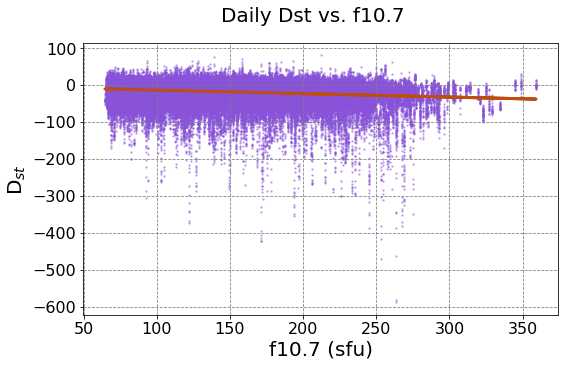

In [657]:
#remove the nans'
nanMask = ((~np.isnan(dailyOmni['f10.7_index'])) & 
           (~np.isnan(dailyOmni['Dst'])))
xVals = dailyOmni.loc[nanMask, 'f10.7_index']
yVals = dailyOmni.loc[nanMask, 'Dst']

fig = plt.figure(figsize=(8.5, 5))
fig.suptitle('Daily Dst vs. f10.7', fontsize=20)

gs  = plt.GridSpec(1, 1, hspace=0.0, wspace=0.2, right = 0.9)

#add subplots
ax1 = fig.add_subplot(gs[0,0])

#set up titles for axis
ax1.set_xlabel('f10.7 (sfu)', fontsize = 20)
ax1.set_ylabel('D$_{st}$', fontsize = 20)

#plot values
ax1.scatter(xVals, yVals,  color = '#8853d8', alpha = 0.4, s = 2)

#set up grid
ax1.grid(color='gray', linestyle='dashed')

#how to set up a share axis with alternative colors
ax1.tick_params(labelsize = 16)


#calculate errors and linear fit - 
slope, intercept, rval, pval, stderr = stats.linregress(xVals, yVals)

#calculate the yvalues given the linear fit
yModel = intercept + slope * xVals

#find y errors
RMSE  = lr.calcRMSE(yModel, yVals)

#error on coefficents, slope and y-intercept and.
errSlope,  errInter = lr.calcCoeffsErr(xVals,  RMSE)

ax1.plot(xVals, yModel, color = '#be4d0f', lw = 3)

print("Fit Report: \n \tUncert. on Y: +/- {:.2f}".format(RMSE) + 
      "\n \tIntercept: {:.2f} +/- {:.2f}".format(intercept, errInter)
      + "\n\tSlope: {:.2f} +/- {:.2f}".format(slope, errSlope) 
      + "\n\tPearson linear correlation: {:.2f}, r-squared: {:.2f}".format(rval, rval**2))


### Can we reliably tie together Dst and f10.7 in this manner?

## *Part 4 - Dst and Solar Data - Classification Problem*

Another common method to analyze dependence, and eventual prediction, is by taking such a non-linear situation and turning this into a classification problem. 

Let's consider trying to see if we can find when f10.7 is best at predicting if Dst is signifying a geomagnetic storm. In this case, consider a storm to occur when Dst < -50 nT. 

In [658]:
#Step 1 - Set up "Events" or what we want to predict as a binary problem. 

dailyOmni['Events'] = np.zeros(len(dailyOmni))

DBound = -50

indEvent = dailyOmni['Dst'] < DBound

dailyOmni.loc[indEvent, 'Events'] = 1

#we have now turned our "continuous data" - into a classifcation problem

In [659]:
#Step 2 - create a threshold above which f10.7 we might expect a storm to occur

dailyOmni['Predict'] = np.zeros(len(dailyOmni))

#set up a boundary above which we want a binary value
FBound = 200
indPredict = dailyOmni['f10.7_index'] > FBound
dailyOmni.loc[indPredict, 'Predict'] = 1


In [660]:
#Step 3 - how good did this do at finding out when all the "potential storm" times
#occured?

#this is what we imported from the sklearn module 
#what this does is calculate given an "truth" column and a "predict" column
#how many times we had an event successfully guessed.

#the .ravel command "unwraps" this - 
N, F, M, H = confusion_matrix(dailyOmni['Events'], dailyOmni['Predict']).ravel()

print('True Positives: {}'.format(H), 'False Positives: {}'.format(F), '\n' 
      'False Negatives: {}'.format(M), 'True Negatives: {}'.format(N))


True Positives: 5465 False Positives: 27151 
False Negatives: 14848 True Negatives: 287024


#### Let's take a moment and talk about what this means
-

-

-


 
 ----

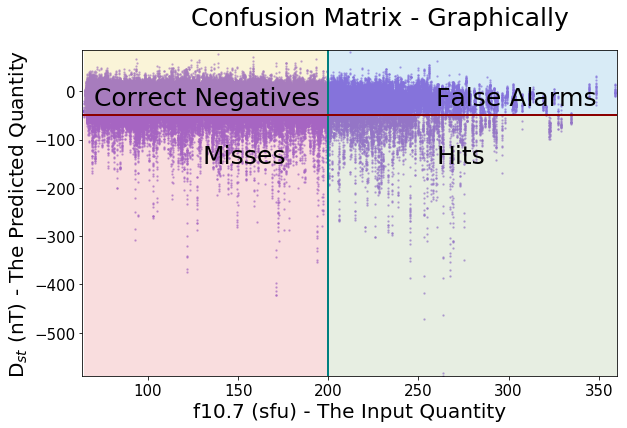

In [661]:
###how does this look plotted?

fig = plt.figure(figsize=(11, 6))

fig.suptitle('Confusion Matrix - Graphically', fontsize = 25)

#create grid spec and axis
gs = plt.GridSpec(1, 1, hspace=0.0, wspace=0.0, right = 0.8)

#creating ax1 and ax2 for upper plots
ax = fig.add_subplot(gs[:,:])
ax.scatter(dailyOmni['f10.7_index'], dailyOmni['Dst'], s = 2, 
           color = '#8853d8', alpha = 0.5)


###################ADD PATCHES LABELING INDEX

#False Alarms

#rectangle commands work by adding the xy left of the rectangle to the width and height
#Rectangle((X, Y), width, height)
ax.add_patch(Rectangle((FBound, DBound), 500, 500, alpha=0.3, facecolor = "#7fc0e4"))

#Hits
ax.add_patch(Rectangle((FBound, np.nanmin(dailyOmni['Dst'])), 
                       FBound, DBound - np.nanmin(dailyOmni['Dst']), 
                       alpha=0.3, facecolor = "#b2c79f"))
#Misses
ax.add_patch(Rectangle((np.nanmin(dailyOmni['f10.7_index']), np.nanmin(dailyOmni['Dst'])), 
                       FBound - np.nanmin(dailyOmni['f10.7_index']), 
                       DBound - np.nanmin(dailyOmni['Dst']), 
                       alpha=0.3, facecolor = "#ed9192"))
#Correct Negatives
ax.add_patch(Rectangle((np.nanmin(dailyOmni['f10.7_index']), DBound), 
                       FBound-np.nanmin(dailyOmni['f10.7_index']), 200, 
                       alpha=0.3, facecolor = "#f1dc81"))

#draw boundary lines
ax.axvline(FBound, color = '#007f80', lw = 2.0)
ax.axhline(DBound, color = '#8b0000', lw = 2.0)

#set labels
ax.set_xlabel('f10.7 (sfu) - The Input Quantity', fontsize = 20)
ax.set_ylabel('D$_{st}$ (nT) - The Predicted Quantity', fontsize = 20)
ax.tick_params(labelsize = 15)

#setting nice boundaries
ax.set_xlim([np.nanmin(dailyOmni['f10.7_index'])-1, np.nanmax(dailyOmni['f10.7_index'])+1])
ax.set_ylim([np.nanmin(dailyOmni['Dst']), np.nanmax(dailyOmni['Dst'])+5])


ax.annotate('False Alarms', xy = (FBound + 60, DBound + 20), fontsize = 25)
ax.annotate('Correct Negatives', xy = (FBound - 130, DBound + 20), fontsize = 25)
ax.annotate('Hits', xy = (FBound + 60, DBound - 100), fontsize = 25)
ax.annotate('Misses', xy = (FBound - 70, DBound - 100), fontsize = 25)


plt.savefig('./Figures/ConfusionMatrix.png')

### Do we think this worked well?

## *Part 5 - Calculating Probability of Detection and Prob. of False Detection*

Within the external functions we have two functions, one which calculates the prob. of detection (POD), and one which calculates the probability of false detection (PFD). Recall the POD = H / H + M and the PFD = F / F + N.

In [662]:
#importlib.reload(extFunc)

print("\n POD: {:.2f}".format(extFunc.calcPOD(H, M)) + 
      "\n PFD: {:.2f}".format(extFunc.calcPFD(F, N)))



 POD: 0.27
 PFD: 0.09


### What if you could get a better POD and lower PFD with a different threshold?


In [663]:

#let's try some values of the threshold - 
thresholdVals = np.arange(0, 400, 25)


In [664]:
#set up a dictionary to capture output from performance calculations
perfValues = {}

perfValues['POD'] = np.zeros(len(thresholdVals))
perfValues['PFD'] = np.zeros(len(thresholdVals))

#run through threshold values
for i, t in enumerate(thresholdVals):
    print("Running for threshold value of f10.7 of {}, index {}".format(t, i))
    
    #set up the prediction each time
    dailyOmni['Predict'] = np.zeros(len(dailyOmni))
    
    indPredict = dailyOmni['f10.7_index'] > t
    dailyOmni.loc[indPredict, 'Predict'] = 1
    
    #caclulate the confusion matrix values
    N, F, M, H = confusion_matrix(dailyOmni['Events'], dailyOmni['Predict']).ravel()
    
    #find POD, PDF
    perfValues['POD'][i] = extFunc.calcPOD(H, M)
    
    perfValues['PFD'][i] = extFunc.calcPFD(F, N)

Running for threshold value of f10.7 of 0, index 0
Running for threshold value of f10.7 of 25, index 1
Running for threshold value of f10.7 of 50, index 2
Running for threshold value of f10.7 of 75, index 3
Running for threshold value of f10.7 of 100, index 4
Running for threshold value of f10.7 of 125, index 5
Running for threshold value of f10.7 of 150, index 6
Running for threshold value of f10.7 of 175, index 7
Running for threshold value of f10.7 of 200, index 8
Running for threshold value of f10.7 of 225, index 9
Running for threshold value of f10.7 of 250, index 10
Running for threshold value of f10.7 of 275, index 11
Running for threshold value of f10.7 of 300, index 12
Running for threshold value of f10.7 of 325, index 13
Running for threshold value of f10.7 of 350, index 14
Running for threshold value of f10.7 of 375, index 15


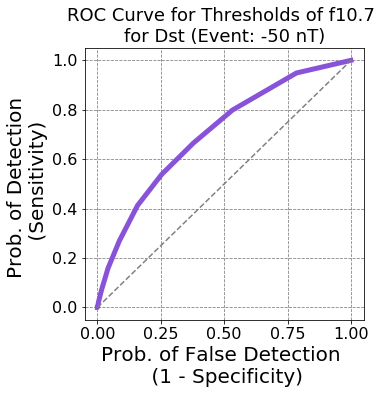

In [665]:
#plot the ROC curve

fig = plt.figure(figsize=(5, 5))

#make grid
gs  = plt.GridSpec(1, 1, hspace=0.0, wspace=0.2, right = 0.9)

#add subplots
ax1 = fig.add_subplot(gs[0,0])

ax1.set_title('ROC Curve for Thresholds of f10.7 \n' + 
             'for Dst (Event: {} nT)'.format(DBound), 
             fontsize=18)

#set up titles for axis
ax1.set_xlabel('Prob. of False Detection \n (1 - Specificity)', fontsize = 20)
ax1.set_ylabel('Prob. of Detection \n (Sensitivity)', fontsize = 20)

#plot values
ax1.plot(perfValues['PFD'], perfValues['POD'],  color = '#8853d8', lw = 5.0)

#set up "random performance line"
ax1.plot(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1), ls = 'dashed', color = 'grey')
#set up grid
ax1.grid(color='gray', linestyle='dashed')

#set nice labelsizes
ax1.tick_params(labelsize = 16)

What can we say about this ROC curve?

# SUMMARY

From this lab you have learned the basics of linear regression (part 2), how to set up a classification problem, and confusion matrices & ROC curves.

Homework: 
- Lab 7 (we skipped Lab 6) due March 16th Friday at 3 PM. Please check within your lab folders for the assignment. 